<a href="https://colab.research.google.com/github/sarveswar-py/Neaural_n_Binary-Multi/blob/main/Team_Tazeen_Assignment1_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim nltk



In [ ]:
# Import necessary libraries
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extract word vectors and corresponding words from the Word2Vec model
word_vectors = model_w2v.wv
words = list(word_vectors.key_to_index.keys())
word_vectors_list = [word_vectors[word] for word in words]

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors_list)

# Plot t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker='o', s=30, alpha=0.7)

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=10)

    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title("t-SNE Visualization of Word Embeddings")
    plt.grid(True)
    plt.show()


Import Libraries and Download NLTK Data:



In [2]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Define a function to preprocess the text data.
python



In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Remove punctuation and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = text.lower()
        words = word_tokenize(text)
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        return words


Define the Corpus:

In [10]:
corpus = [
      "Quantum mechanics provides a mathematical description of much of the dual particle-like and wave-like behavior and interactions of energy and matter.",
          "The juxtaposition of the art exhibit's abstract installations and the traditional sculptures evoked a contemplative response from the viewers.",
              "The implications of artificial intelligence in the realm of healthcare extend far beyond simple automation, touching upon ethical, legal, and social dimensions.",
                  "The enigmatic nature of dark matter continues to baffle astrophysicists, as its elusive properties make it undetectable by conventional means.",
                      "In an unprecedented display of geopolitical strategy, the summit resulted in a multifaceted agreement that addressed both environmental concerns and economic growth."
                      ]

labels = [0, 1, 2, 3, 4]  # Assign a unique label to each sentence for classification

# Preprocess and tokenize the corpus
tokenized_corpus = [preprocess(doc) for doc in corpus]



Train Word2Vec Model:

In [16]:
model_w2v = Word2Vec(
      sentences=tokenized_corpus,
          vector_size=100,
              window=5,
                  min_count=1,
                      workers=4,
                          sg=1,
                              negative=10,
                                  alpha=0.03,
                                      min_alpha=0.0007,
                                          epochs=50
                                          )

# Save the model
#model.save("word2vec.model")

# Save the model
model_w2v.save("word2vec.model")

Create an embedding matrix using the trained Word2Vec model.



In [21]:
# Prepare embedding matrix
word_index = {word: i + 1 for i, word in enumerate(model_w2v.wv.index_to_key)}
embedding_matrix = np.zeros((len(word_index) + 1, 100))

for word, i in word_index.items():
    embedding_vector = model_w2v.wv[word]
    if embedding_vector is not None:
       embedding_matrix[i] = embedding_vector

Tokenize and pad the sequences for the model


In [22]:
# Tokenize and pad the sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

# Ensure all indices are within the range of the embedding matrix
for i in range(len(sequences)):
    sequences[i] = [index if index < len(word_index) else 0 for index in sequences[i]]

    padded_sequences = pad_sequences(sequences, padding='post')

    labels = np.array(labels)

Build the text classification model using LSTM layers

In [23]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=100,
                                        weights=[embedding_matrix],
                                                            input_length=padded_sequences.shape[1],
                                                                                trainable=False))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(set(labels)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the model on the data.


In [24]:
model.fit(padded_sequences, labels, epochs=10, batch_size=2)


Epoch 1/10
3/3 [==============================] - 6s 36ms/step - loss: 1.6016 - accuracy: 0.4000
Epoch 2/10
3/3 [==============================] - 0s 34ms/step - loss: 1.5825 - accuracy: 0.4000
Epoch 3/10
3/3 [==============================] - 0s 32ms/step - loss: 1.6468 - accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 39ms/step - loss: 1.6231 - accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 31ms/step - loss: 1.5985 - accuracy: 0.2000
Epoch 6/10
3/3 [==============================] - 0s 32ms/step - loss: 1.5998 - accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 32ms/step - loss: 1.5438 - accuracy: 0.4000
Epoch 8/10
3/3 [==============================] - 0s 32ms/step - loss: 1.6780 - accuracy: 0.0000e+00
Epoch 9/10
3/3 [==============================] - 0s 30ms/step - loss: 1.6108 - accuracy: 0.4000
Epoch 10/10
3/3 [==============================] - 0s 37ms/step - loss: 1.5806 - accuracy: 0.2000


In [8]:
!pip install tensorflow


In [9]:


import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer


Visualization using t-sne

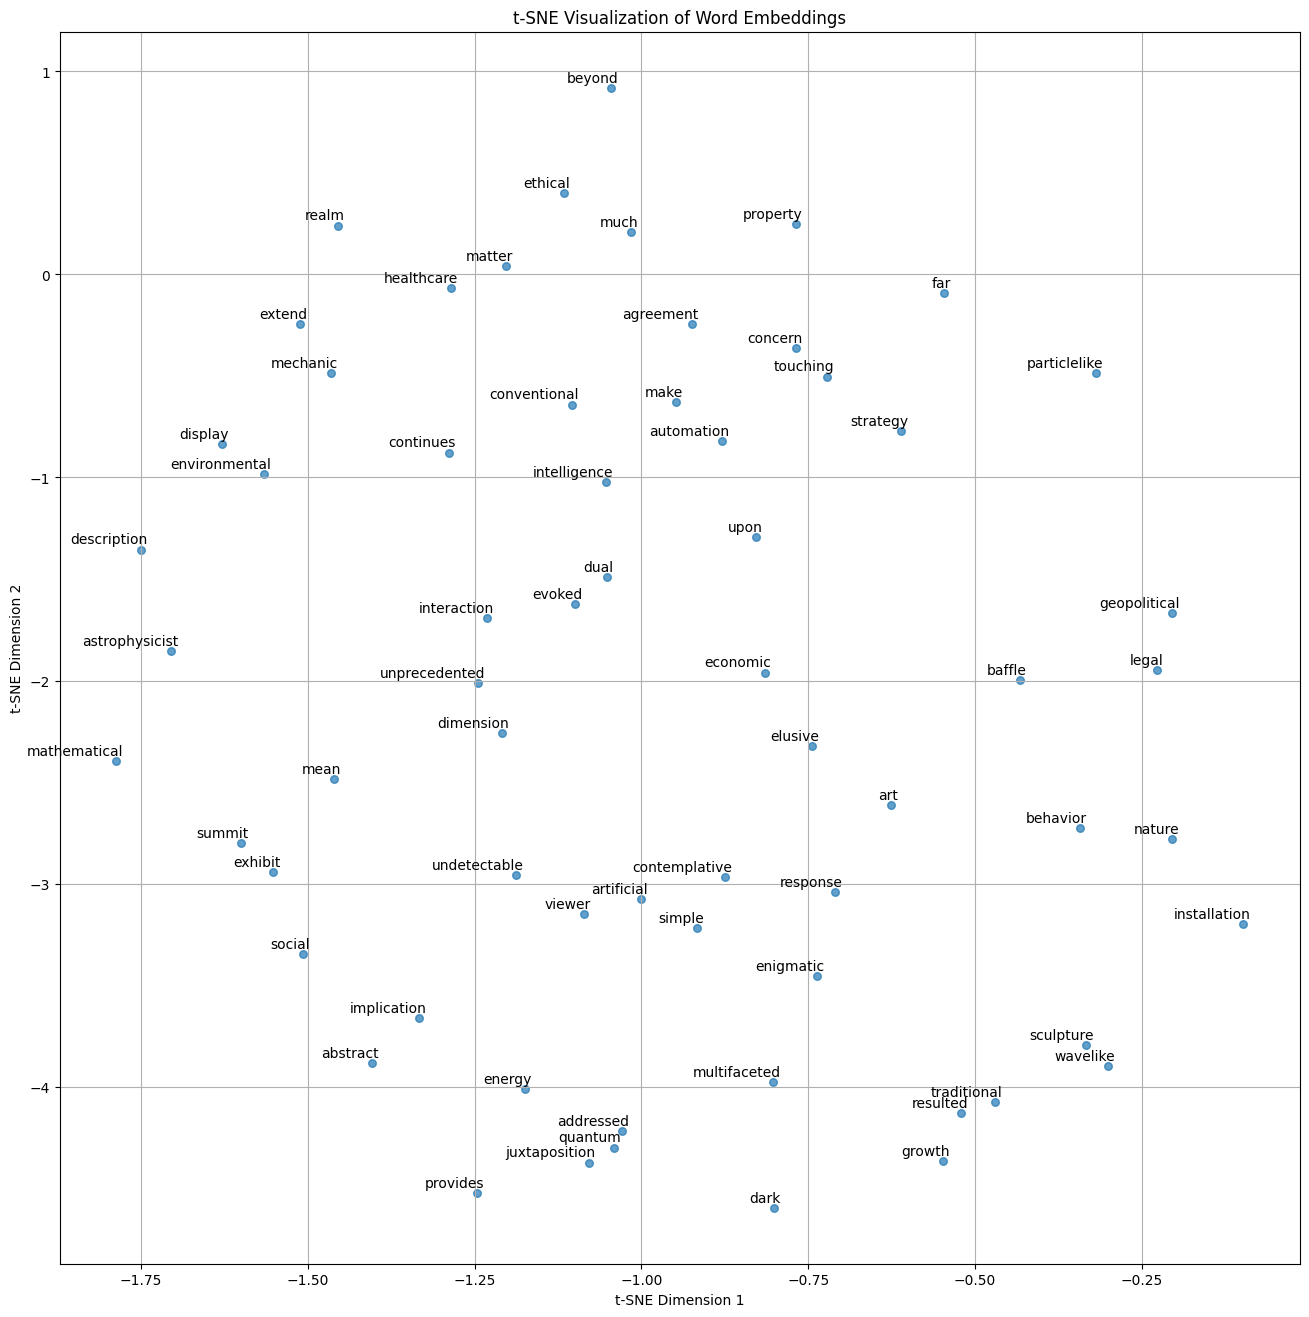

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def plot_embeddings(model):
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)  # Convert tokens to NumPy array for compatibility

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    plt.figure(figsize=(16, 16))
    plt.scatter(new_values[:, 0], new_values[:, 1], marker='o', s=30, alpha=0.7)
    for i, label in enumerate(labels):
              plt.annotate(label,
              xy=(new_values[i, 0], new_values[i, 1]),
              xytext=(5, 2),
              textcoords='offset points',
              ha='right',
              va='bottom',
              fontsize=10)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title("t-SNE Visualization of Word Embeddings")
    plt.grid(True)
    plt.show()

# Assuming word2vec_model is your trained Word2Vec model
plot_embeddings(model_w2v)






















                                                                                                                                                                                                                           #plot_embeddings(model_w2v)
